## PyCaret: freMTPL2freq (Regression)

Based on: https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb

In [1]:
time_limit = 60  # 1 hour max (confirm with timer)
metric = "MAE"  # specify your evaluation metric
target = "ClaimNb" # name of target or label variable

## Import

In [2]:
# Import packages

from pycaret.regression import *

import pandas as pd
import pycaret

In [3]:
# Import data

train_data = pd.read_csv("freMTPL2freq_dataset_train.csv")
test_data = pd.read_csv("freMTPL2freq_dataset_test.csv")

## Tidy

(skipped)

## Transform

In [4]:
# remove "IDpol" (should not be a predictor)

train_data = train_data.drop(["IDpol"], axis=1)
test_data = test_data.drop(["IDpol"], axis=1)

## Visualize

(skipped)

## Model 1

In [5]:
%%time

# init setup
s = setup(train_data, target=target, session_id=123)

,Description,Value
0,Session id,123
1,Target,ClaimNb
2,Target type,Regression
3,Original data shape,"(474765, 11)"
4,Transformed data shape,"(474765, 47)"
5,Transformed train set shape,"(332335, 47)"
6,Transformed test set shape,"(142430, 47)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,4


CPU times: user 8.89 s, sys: 934 ms, total: 9.83 s
Wall time: 33 s


In [6]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [7]:
%%time

# compare baseline models
best = compare_models(sort=metric, budget_time=time_limit)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.0387,0.0438,0.2093,-0.0353,0.1383,1.0000,5.0620
lightgbm,Light Gradient Boosting Machine,0.0719,0.0409,0.2021,0.0344,0.1342,0.9274,5.7070
catboost,CatBoost Regressor,0.0720,0.0410,0.2023,0.0329,0.1345,0.9238,14.2270
knn,K Neighbors Regressor,0.0720,0.0494,0.2223,-0.1682,0.1553,0.9455,14.5030
xgboost,Extreme Gradient Boosting,0.0723,0.0413,0.2031,0.0249,0.1353,0.9232,23.2100
gbr,Gradient Boosting Regressor,0.0724,0.0410,0.2025,0.0314,0.1342,0.9333,18.5270
omp,Orthogonal Matching Pursuit,0.0736,0.0418,0.2043,0.0141,0.1355,0.9480,2.4840
br,Bayesian Ridge,0.0740,0.0417,0.2041,0.0157,0.1354,0.9462,0.6410
ridge,Ridge Regression,0.0741,0.0417,0.2041,0.0157,0.1354,0.9460,3.2990
lr,Linear Regression,0.0741,0.0417,0.2041,0.0157,0.1354,0.9460,10.8740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

CPU times: user 4min 32s, sys: 7min 17s, total: 11min 49s
Wall time: 26min


In [8]:
# predict on test set
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.0384,0.0434,0.2082,-0.0351,0.1376,1.0000


,Exposure,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Area,Density,Region,ClaimNb,prediction_label
230081,0.080000,6,3,38,60,B5,Regular,D,645,Languedoc-Roussillon,0,-1.421114e-07
369544,0.005464,7,9,43,50,B1,Diesel,E,4116,Centre,0,-1.080197e-09
466743,0.370000,7,1,33,50,B12,Diesel,E,6485,Ile-de-France,0,7.811178e-09
429675,0.070000,8,4,39,50,B12,Diesel,B,52,Limousin,0,-2.358787e-07
283377,1.000000,8,13,60,50,B4,Regular,D,1313,Centre,0,1.755573e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
242064,0.080000,7,1,47,50,B1,Regular,E,2163,Pays-de-la-Loire,0,-9.149009e-09
375865,1.000000,6,13,82,50,B1,Regular,E,3317,Provence-Alpes-Cotes-D'Azur,0,1.080891e-08
421022,0.030000,6,5,58,50,B12,Regular,C,462,Languedoc-Roussillon,0,-6.203555e-07
223810,0.080000,6,12,40,90,B1,Diesel,C,122,Languedoc-Roussillon,0,-2.675762e-07


In [9]:
# predict model on new_data
predictions = predict_model(best, data=test_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.0400,0.0462,0.2149,-0.0359,0.1406,1.0000


In [10]:
%%time

# find best model based on CV metrics
automl(optimize=metric)

CPU times: user 3.27 s, sys: 597 ms, total: 3.87 s
Wall time: 5.41 s


HuberRegressor()

In [11]:
%%time

# deep check function: https://deepchecks.com/
# took a long time or stalled out, but could be useful for checking model, e.g. leakage
# deep_check(best)

CPU times: user 3 µs, sys: 5 µs, total: 8 µs
Wall time: 15.7 µs


## Communicate

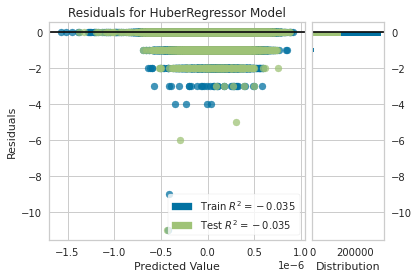

In [12]:
# plot residuals
plot_model(best, plot='residuals')

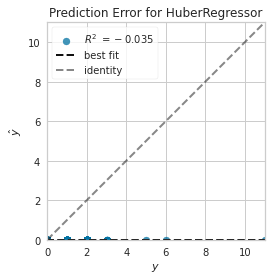

In [13]:
# plot error
plot_model(best, plot='error')

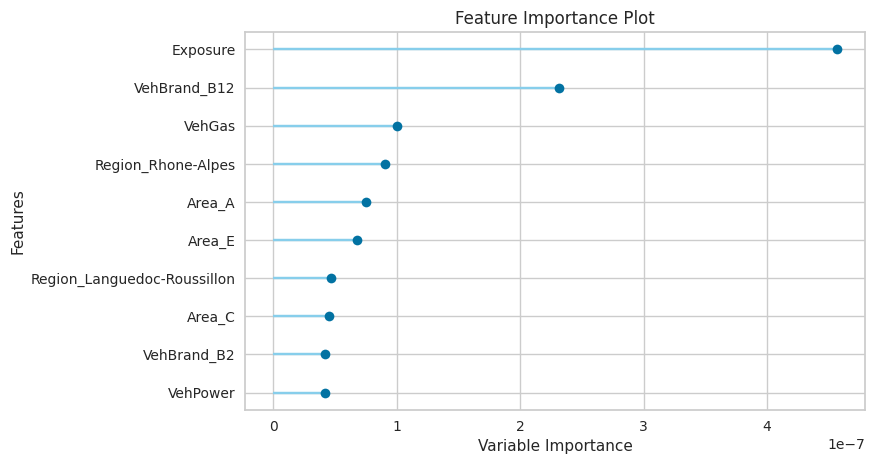

In [14]:
# plot feature importance
plot_model(best, plot='feature')